<a href="https://colab.research.google.com/github/purshottamkumarr/Supervised_Learning_Project/blob/main/Car_Predication(7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


In [ ]:
data = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [ ]:
data.shape

(4340, 8)

In [ ]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
data.fuel.value_counts()

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

In [ ]:
data.seller_type.value_counts()

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64

In [ ]:
data.transmission.value_counts()

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64

In [ ]:
data.owner.value_counts()

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

In [ ]:
## Encoding the data

data.replace({"fuel":{"Diesel":0,"Petrol":1,"CNG":2,"LPG":3,"Electric":4}},inplace = True)

data.replace({"seller_type":{"Individual":0,"Dealer":1,"Trustmark Dealer":2}},inplace = True)

data.replace({"transmission":{"Manual":0,"Automatic":1}},inplace = True)

data.replace({"owner":{"First Owner":0,"Second Owner":1,"Third Owner":2,"Fourth & Above Owner":3,"Test Drive Car":4}},inplace =True)


In [ ]:
data.head(50)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,1
5,Maruti Alto LX BSIII,2007,140000,125000,1,0,0,0
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,1,0,0,0
7,Tata Indigo Grand Petrol,2014,240000,60000,1,0,0,1
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,1,0,0,0
9,Maruti Celerio Green VXI,2017,365000,78000,2,0,0,0


In [ ]:
x = data.drop(["name","selling_price"],axis = 1)
y = data["selling_price"]
print(x)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     1            0             0      0
1     2007      50000     1            0             0      0
2     2012     100000     0            0             0      0
3     2017      46000     1            0             0      0
4     2014     141000     0            0             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     0            0             0      1
4336  2014      80000     0            0             0      1
4337  2009      83000     1            0             0      1
4338  2016      90000     0            0             0      0
4339  2016      40000     1            0             0      0

[4340 rows x 6 columns]


In [ ]:
print(y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(4340, 6) (3906, 6) (434, 6)


In [ ]:
linear_model_regression = LinearRegression()
linear_model_regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
## Predication on our data
training_data_predication = linear_model_regression.predict(x_train)

In [ ]:
## R squred Error
error_score = metrics.r2_score(training_data_predication,y_train)
print(error_score)

-0.25693509372000256


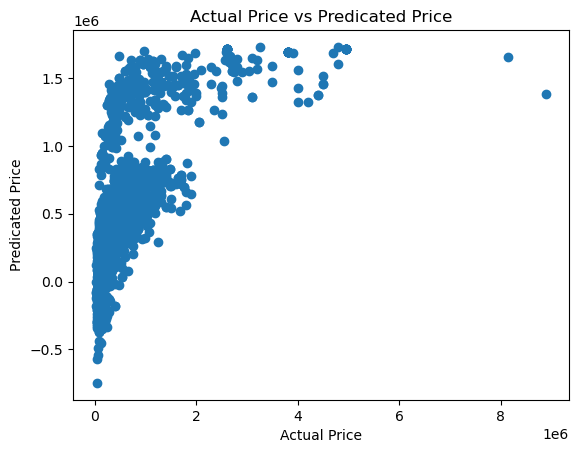

In [ ]:
## Visulize the data Acutal Price vs Predict_price

plt.scatter(y_train,training_data_predication)
plt.xlabel("Actual Price")
plt.ylabel("Predicated Price")
plt.title("Actual Price vs Predicated Price");

In [ ]:
lass_reg_model = Lasso()

In [ ]:
lass_model_regression = lass_reg_model.fit(x_train,y_train)

In [ ]:
training_data_lasso = lass_model_regression.predict(x_train)

In [ ]:
## R squre error
error_score = metrics.r2_score(y_train,training_data_lasso)
print(error_score)

0.4430787587921927


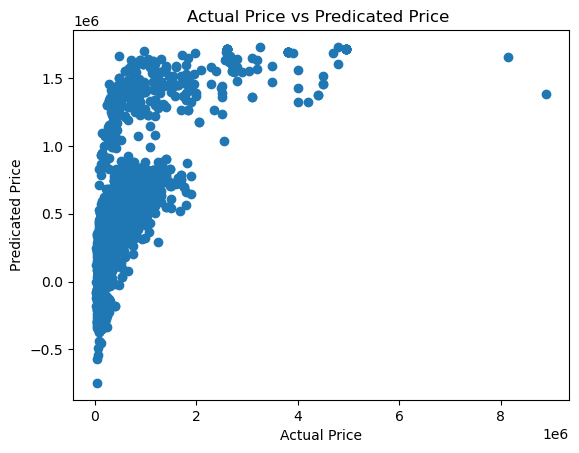

In [ ]:
plt.scatter(y_train,training_data_lasso)
plt.xlabel("Actual Price")
plt.ylabel("Predicated Price")
plt.title("Actual Price vs Predicated Price ");